In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier





In [ ]:



STARS_PATH = "../data/stars_gaia_sample.csv"
BH_PATH    = "../data/blackholes_gaia_sample.csv"

# Load and label
stars = pd.read_csv(STARS_PATH).assign(label=0)
bh    = pd.read_csv(BH_PATH).assign(label=1)

# Add missing columns to stars so features align
#stars["ruwe"] = 0.0
#stars["quasar_probability"] = 0.0

features = [
    #"ra",
     # "dec",
      "parallax",
    "pmra", "pmdec",
    "phot_g_mean_mag", "bp_rp",
    #"ruwe", #"quasar_probability",
]

stars = stars[features + ["label"]]
bh    = bh[features + ["label"]]

df = pd.concat([stars, bh], ignore_index=True).dropna()#fillna(0)
X = df[features]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
logreg.fit(X_train, y_train)
print("LogReg\n", classification_report(y_test, logreg.predict(X_test), target_names=["star","blackhole"]))

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
print("RandomForest\n", classification_report(y_test, rf.predict(X_test), target_names=["star","blackhole"]))

LogReg
               precision    recall  f1-score   support

        star       0.93      0.90      0.92       195
   blackhole       0.91      0.94      0.92       200

    accuracy                           0.92       395
   macro avg       0.92      0.92      0.92       395
weighted avg       0.92      0.92      0.92       395

RandomForest
               precision    recall  f1-score   support

        star       0.94      0.93      0.93       195
   blackhole       0.93      0.94      0.94       200

    accuracy                           0.93       395
   macro avg       0.93      0.93      0.93       395
weighted avg       0.93      0.93      0.93       395



## Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="darkgrid")
plot_dir = Path("../plots_Stars_Blackholes"); plot_dir.mkdir(exist_ok=True)

# Scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="ra", y="dec", hue="label", alpha=0.5)
plt.tight_layout()
plt.savefig(plot_dir / "stars_vs_blackholes(no quasar_probability and more).png", dpi=200, bbox_inches="tight")
plt.show()
plt.close()

# Parallax KDE
g = sns.displot(data=df, x="parallax", hue="label", kind="kde", fill=True)
g.fig.savefig(plot_dir / "parallax_kde_blackholes(no quasar_probability and more).png", dpi=200, bbox_inches="tight")
plt.show()
plt.close(g.fig)




ValueError: Could not interpret value `ra` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

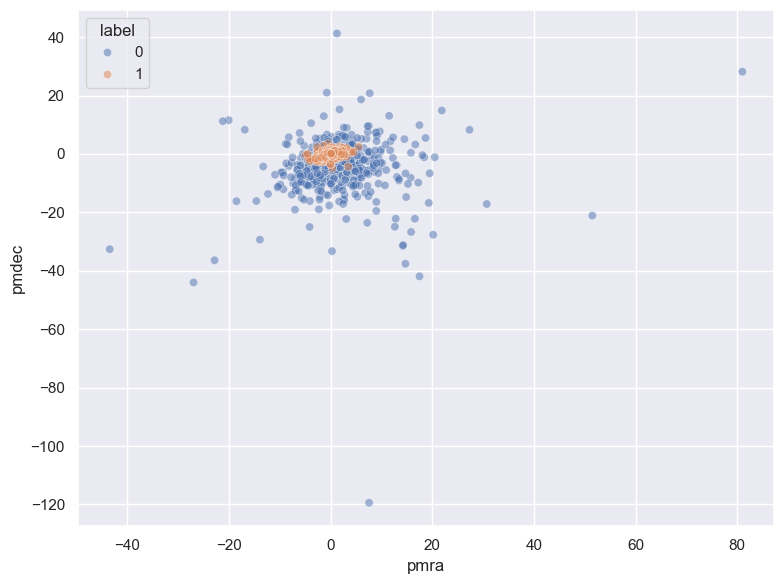

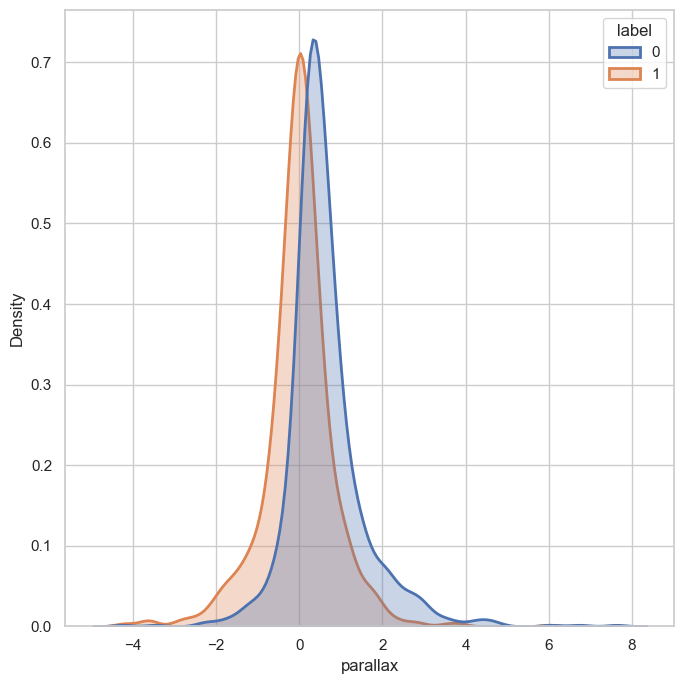

In [ ]:
# Scatter pmra vs pmdec
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pmra", y="pmdec", hue="label", alpha=0.5)
plt.tight_layout()
plt.savefig(plot_dir / "pmra_pmdec_blackholes.png", dpi=200, bbox_inches="tight")
plt.show()
plt.close()

# Parallax KDE
g = sns.displot(data=df, x="parallax", hue="label", kind="kde", fill=True)
g.fig.savefig(plot_dir / "parallax_kde_blackholes.png", dpi=200, bbox_inches="tight")
plt.close(g.fig)



sns.set_theme(style="whitegrid")
plot_dir = Path("../plots_Stars_Blackholes"); plot_dir.mkdir(exist_ok=True)

plt.figure(figsize=(7, 7))
sns.kdeplot(
    data=df,
    x="parallax",
    hue="label",
    fill=True,
    alpha=0.3,
    linewidth=2,
    common_norm=False,
)
plt.xlabel("parallax")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(plot_dir / "parallax_kde_blackholes.png", dpi=200, bbox_inches="tight")
plt.show()
plt.close()

